In [34]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from pandas.plotting import scatter_matrix

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


conn = connectDB("Dataset")
cur = conn.cursor()

try:
    #query data using pyscopg2
    #sql = f"select * from public.\"studentInfoSTG\" LIMIT 50"
    #print(sql)
    #cur.execute(sql)
    #rows = cur.fetchall()
    # close communication with the PostgreSQL database server
    #cur.close()
    # commit the changes
except (Exception) as error:
    print(error)
    cur.execute("rollback")

In [52]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"analysisFeatures\" ", con=conn).reset_index()
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50) 
df.head()  

,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,pass_fail_ind,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,0,3733,DDD,2013J,STEM,261,J,2013,0,Withdrawn,None,QUARTERB4,-68.0,-8.0,N,M,55<=,South Region,HE Qualification,90-100%,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6516,AAA,2014J,SocialScience,269,J,2014,0,Pass,PASS,QUARTERB4,-52.0,NaN,N,M,55<=,Scotland,HE Qualification,80-90%,60,256.0,790.0,389.0,715.0,641.0,2791.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,2,8462,DDD,2013J,STEM,261,J,2013,0,Withdrawn,None,LONGB4,-137.0,119.0,N,M,55<=,London Region,HE Qualification,30-40%,90,81.0,442.0,123.0,0.0,0.0,646.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,3,8462,DDD,2014J,STEM,262,J,2014,1,Withdrawn,None,QUARTERB4,-38.0,18.0,N,M,55<=,London Region,HE Qualification,30-40%,60,0.0,10.0,0.0,0.0,0.0,10.0,0.0,43.0,43.0,0.0,50.0,4.0,0.0
4,4,11391,AAA,2013J,SocialScience,268,J,2013,0,Pass,PASS,LONGB4,-159.0,NaN,N,M,55<=,East Anglian Region,HE Qualification,90-100%,240,98.0,431.0,99.0,85.0,221.0,934.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [4]:
df.dtypes

index                           int64
id_student                      int64
code_module                    object
code_presentation              object
module_domain                  object
module_presentation_length      int64
term                           object
year                           object
num_of_prev_attempts            int64
final_result                   object
pass_fail_ind                  object
reg_period                     object
date_registration             float64
date_unregistration           float64
disability                     object
gender                         object
age_band                       object
region                         object
highest_education              object
imd_band                       object
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
cma_assmt_sc

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64


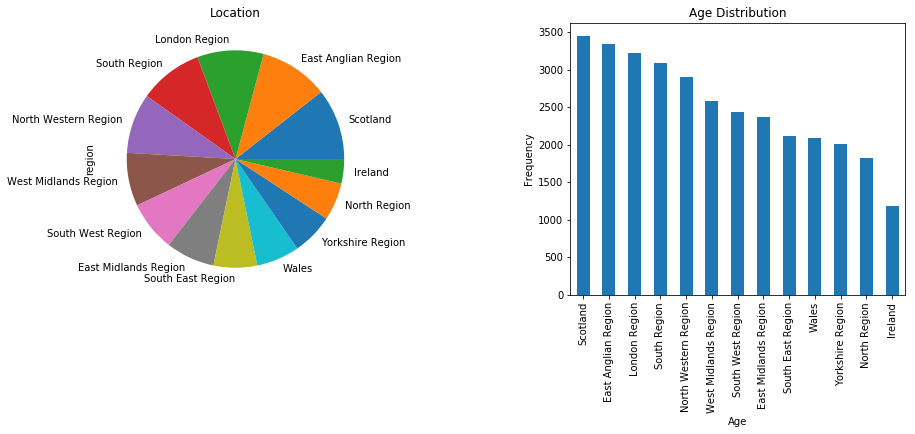

In [5]:
#test still contains duplicates, we need to remove them before running these charts

presentation_counts = df['region'].value_counts()
print (presentation_counts)


# attempt pie chart and histogram pie chart.  Using both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Location')

plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# add more space between the two plots
plt.subplots_adjust(wspace=0.5)

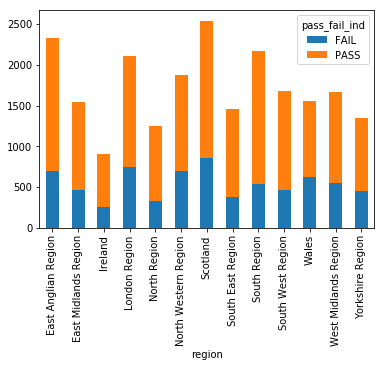

In [6]:
df.groupby(['region','pass_fail_ind']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

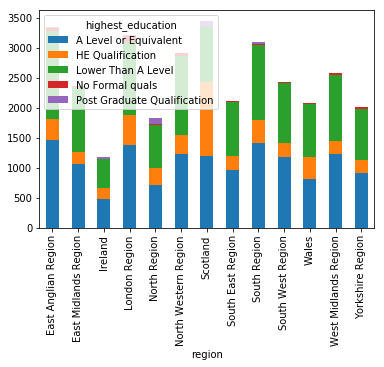

In [7]:
df.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

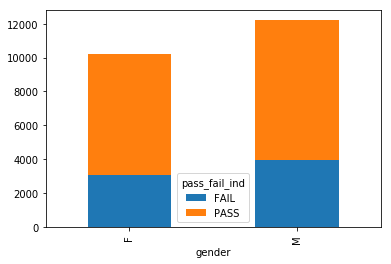

In [8]:
df.groupby(['gender', 'pass_fail_ind']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


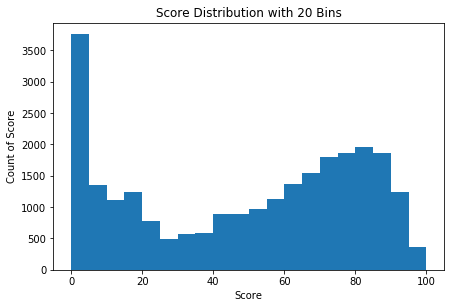

In [9]:
#test still contains duplicates, we need to remove them before running these charts

#we're going to need to create bins for these scores

#grade_counts = df["tma_cma_assmt_score"].value_counts()



# attempts pie chart and histogram pie chart.  Using both visuals to see which is better at displaying the data.

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['tma_cma_assmt_score'], bins=20, range=(df['tma_cma_assmt_score'].min(),df['tma_cma_assmt_score'].max()))
plt.title('Score Distribution with 20 Bins')
plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

In [10]:
# extract everything from 'table_name' into a dataframe
df2 = pd_sql.read_sql(f"select * from public.\"studentAssessmentFULLSTG\" ", con=conn).reset_index()
df2.head()  

,index,id_assessment,id_student,date_submitted,is_banked,scoretxt,score,code_module,code_presentation,assessment_type,final_sub_date,weight
0,0,1759,6516,51,0,48,48.0,AAA,2014J,TMA,54.0,20.0
1,1,1760,6516,116,0,63,63.0,AAA,2014J,TMA,117.0,20.0
2,2,1758,6516,17,0,60,60.0,AAA,2014J,TMA,19.0,10.0
3,3,1761,6516,164,0,61,61.0,AAA,2014J,TMA,166.0,20.0
4,4,1762,6516,210,0,77,77.0,AAA,2014J,TMA,215.0,30.0


In [24]:
#count the number of unique student ids
df['id_student'].count()

32593

In [32]:
#count the number of semesters
df['code_presentation'].nunique()

4

In [31]:
#count the number of classes
df['code_module'].nunique()

7

In [33]:
#describing the data
df.describe()

,index,id_student,module_presentation_length,num_of_prev_attempts,date_registration,date_unregistration,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
count,32593.000000,3.259300e+04,32593.000000,32593.000000,32548.000000,10072.000000,32593.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25770.000000,25770.000000,25793.000000,25793.000000,25793.000000,25793.000000
mean,16296.000000,7.066877e+05,256.010125,0.163225,-69.411300,49.757645,79.758691,79.200520,528.206568,278.671229,332.652115,304.142597,2.646639,46.025901,48.674902,0.192223,66.634862,0.068623,12.605164
std,9408.932998,5.491673e+05,13.179078,0.479758,49.260522,82.460890,41.071900,139.738365,602.251810,397.554155,477.088998,478.721574,5.726917,31.389174,31.955937,0.394055,39.538227,0.575844,27.370270
min,0.000000,3.733000e+03,234.000000,0.000000,-322.000000,-365.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8148.000000,5.085730e+05,241.000000,0.000000,-100.000000,-2.000000,60.000000,4.000000,156.000000,47.000000,18.000000,0.000000,0.000000,13.500000,15.920000,0.000000,25.000000,0.000000,0.000000
50%,16296.000000,5.903100e+05,262.000000,0.000000,-57.000000,27.000000,60.000000,31.000000,339.000000,142.000000,160.000000,122.000000,0.000000,52.640000,56.010000,0.000000,97.000000,0.000000,0.000000
75%,24444.000000,6.444530e+05,268.000000,0.000000,-29.000000,109.000000,120.000000,94.000000,683.000000,342.000000,447.000000,398.000000,2.600000,73.500000,77.270000,0.000000,100.000000,0.000000,0.000000
max,32592.000000,2.716795e+06,269.000000,6.000000,167.000000,444.000000,655.000000,3731.000000,9616.000000,7592.000000,6535.000000,12541.000000,25.000000,99.720000,100.000000,1.000000,100.000000,12.000000,100.000000


In [13]:
#count of null values
df.isnull().sum()

index                             0
id_student                        0
code_module                       0
code_presentation                 0
module_domain                     0
module_presentation_length        0
term                              0
year                              0
num_of_prev_attempts              0
final_result                      0
pass_fail_ind                 10156
reg_period                      127
date_registration                45
date_unregistration           22521
disability                        0
gender                            0
age_band                          0
region                            0
highest_education                 0
imd_band                          0
studied_credits                   0
b4_sum_clicks                  6800
q1_sum_clicks                  6800
q2_sum_clicks                  6800
q3_sum_clicks                  6800
q4_sum_clicks                  6800
cma_assmt_score                6800
tma_assmt_score             

In [14]:
#distribution of gender based on course genre
df.groupby(['code_presentation']).count()

,index,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,pass_fail_ind,...,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
code_presentation,,,,,,,,,,,,,,,,,,,,,
2013B,4684,4684,4684,4684,4684,4684,4684,4684,4684,3336,...,3801,3801,3801,3801,3793,3793,3801,3801,3801,3801
2013J,8845,8845,8845,8845,8845,8845,8845,8845,8845,6476,...,7081,7081,7081,7081,7075,7075,7081,7081,7081,7081
2014B,7804,7804,7804,7804,7804,7804,7804,7804,7804,5191,...,5989,5989,5989,5989,5986,5986,5989,5989,5989,5989
2014J,11260,11260,11260,11260,11260,11260,11260,11260,11260,7434,...,8922,8922,8922,8922,8916,8916,8922,8922,8922,8922


In [15]:
#distribution of gender based on course genre
df.groupby(['code_module']).count()

,index,id_student,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,pass_fail_ind,...,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
code_module,,,,,,,,,,,,,,,,,,,,,
AAA,748,748,748,748,748,748,748,748,748,622,...,705,705,705,705,704,704,705,705,705,705
BBB,7909,7909,7909,7909,7909,7909,7909,7909,7909,5521,...,6054,6054,6054,6054,6049,6049,6054,6054,6054,6054
CCC,4434,4434,4434,4434,4434,4434,4434,4434,4434,2459,...,3410,3410,3410,3410,3409,3409,3410,3410,3410,3410
DDD,6272,6272,6272,6272,6272,6272,6272,6272,6272,4022,...,4932,4932,4932,4932,4928,4928,4932,4932,4932,4932
EEE,2934,2934,2934,2934,2934,2934,2934,2934,2934,2212,...,2296,2296,2296,2296,2295,2295,2296,2296,2296,2296
FFF,7762,7762,7762,7762,7762,7762,7762,7762,7762,5359,...,6287,6287,6287,6287,6279,6279,6287,6287,6287,6287
GGG,2534,2534,2534,2534,2534,2534,2534,2534,2534,2242,...,2109,2109,2109,2109,2106,2106,2109,2109,2109,2109


In [16]:
df.head()

,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,...,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,0,3733,DDD,2013J,STEM,261,J,2013,0,Withdrawn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6516,AAA,2014J,SocialScience,269,J,2014,0,Pass,...,389.0,715.0,641.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,2,8462,DDD,2013J,STEM,261,J,2013,0,Withdrawn,...,123.0,0.0,0.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,3,8462,DDD,2014J,STEM,262,J,2014,1,Withdrawn,...,0.0,0.0,0.0,0.0,43.0,43.0,0.0,50.0,4.0,0.0
4,4,11391,AAA,2013J,SocialScience,268,J,2013,0,Pass,...,99.0,85.0,221.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [17]:
df.groupby(['gender', 'module_domain']).count()

index  id_student  code_module  code_presentation  \
gender module_domain                                                      
F      STEM            5370        5370         5370               5370   
       SocialScience   9348        9348         9348               9348   
M      STEM           16032       16032        16032              16032   
       SocialScience   1843        1843         1843               1843   

                      module_presentation_length   term   year  \
gender module_domain                                             
F      STEM                                 5370   5370   5370   
       SocialScience                        9348   9348   9348   
M      STEM                                16032  16032  16032   
       SocialScience                        1843   1843   1843   

                      num_of_prev_attempts  final_result  pass_fail_ind  ...  \
gender module_domain                                                     ...   
F      STEM                           5370          5370           3300  ...   
       SocialScience                  9348          9348           6932  ...   
M      STEM                          16032         16032          10752  ...   
       SocialScience                  1843          1843           1453  ...   

                      q2_sum_clicks  q3_sum_clicks  q4_sum_clicks  \
gender module_domain                                                
F      STEM                    4228           4228           4228   
       SocialScience           7373           7373           7373   
M      STEM                   12697          12697          12697   
       SocialScience           1495           1495           1495   

                      cma_assmt_score  tma_assmt_score  tma_cma_assmt_score  \
gender module_domain                                                          
F      STEM                      4228             4224                 4224   
       SocialScience             7373             7365                 7365   
M      STEM                     12697            12687                12687   
       SocialScience             1495             1494                 1494   

                      final_exam  total_weight  is_reenrolled  \
gender module_domain                                            
F      STEM                 4228          4228           4228   
       SocialScience        7373          7373           7373   
M      STEM                12697         12697          12697   
       SocialScience        1495          1495           1495   

                      final_exam_score  
gender module_domain                    
F      STEM                       4228  
       SocialScience              7373  
M      STEM                      12697  
       SocialScience              1495  

[4 rows x 31 columns]

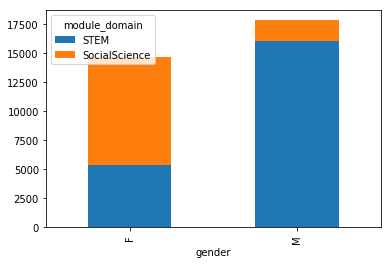

In [18]:
df.groupby(['gender', 'module_domain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

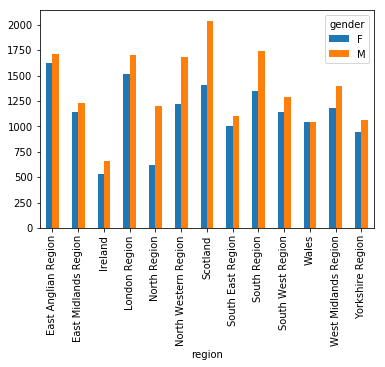

In [19]:
df.groupby(['region', 'gender']).size().unstack().plot(kind='bar')
plt.show()

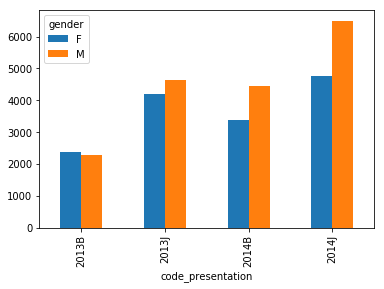

In [20]:
df.groupby(['code_presentation', 'gender']).size().unstack().plot(kind='bar')
plt.show()

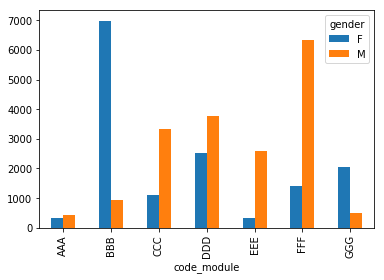

In [21]:
df.groupby(['code_module', 'gender']).size().unstack().plot(kind='bar')
plt.show()

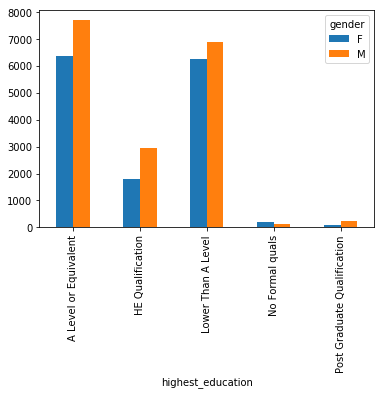

In [22]:
df.groupby(['highest_education', 'gender']).size().unstack().plot(kind='bar')
plt.show()

# Scatter Matrix for All the Features in Our Finalized Dataset

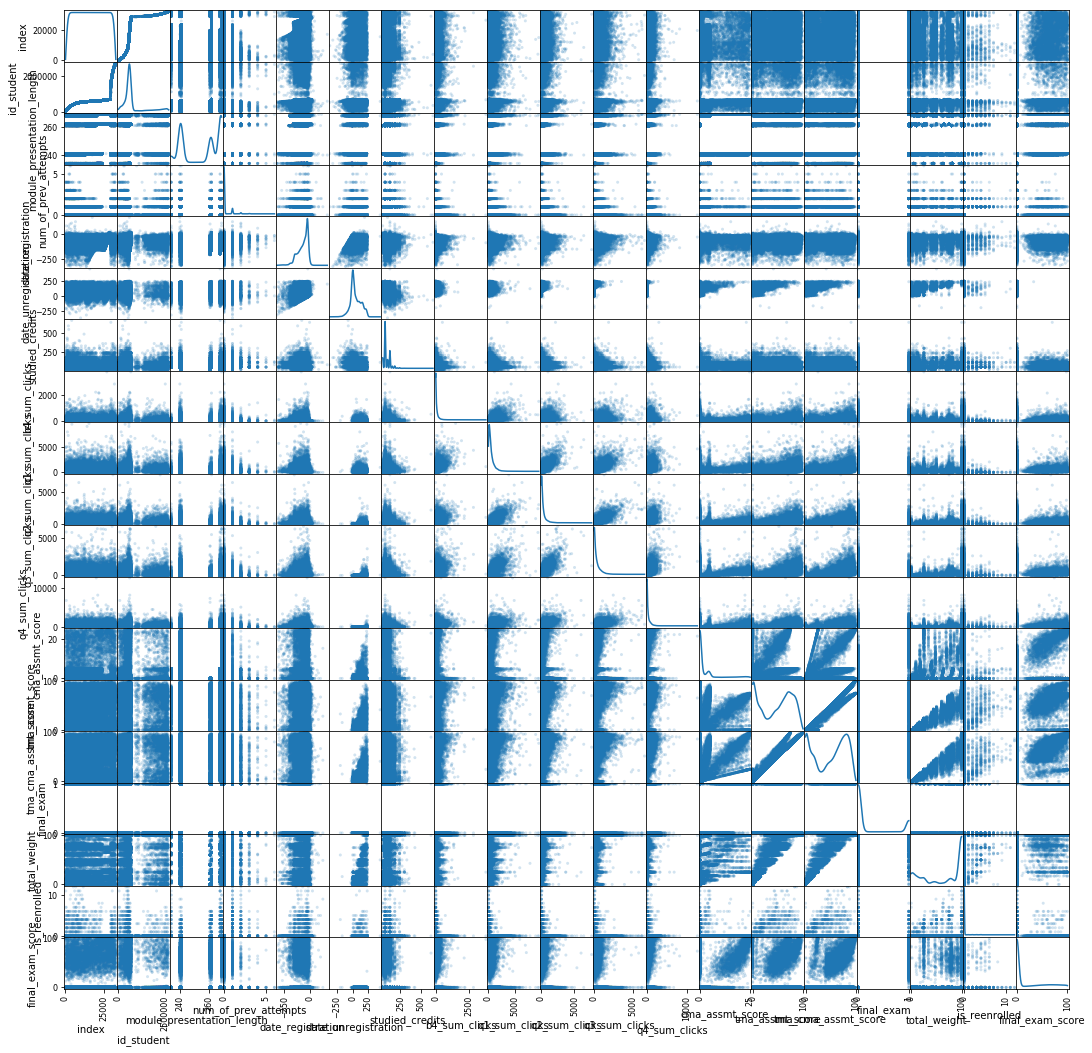

In [35]:
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [36]:
df.head()

,index,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,...,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,0,3733,DDD,2013J,STEM,261,J,2013,0,Withdrawn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6516,AAA,2014J,SocialScience,269,J,2014,0,Pass,...,389.0,715.0,641.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,2,8462,DDD,2013J,STEM,261,J,2013,0,Withdrawn,...,123.0,0.0,0.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,3,8462,DDD,2014J,STEM,262,J,2014,1,Withdrawn,...,0.0,0.0,0.0,0.0,43.0,43.0,0.0,50.0,4.0,0.0
4,4,11391,AAA,2013J,SocialScience,268,J,2013,0,Pass,...,99.0,85.0,221.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [48]:
df_test = df[['index','id_student', 'tma_cma_assmt_score', 'code_module', 'code_presentation', 'module_domain', 'final_result']]

In [49]:
df_test.head()

,index,id_student,tma_cma_assmt_score,code_module,code_presentation,module_domain,final_result
0,0,3733,NaN,DDD,2013J,STEM,Withdrawn
1,1,6516,63.5,AAA,2014J,SocialScience,Pass
2,2,8462,34.9,DDD,2013J,STEM,Withdrawn
3,3,8462,43.0,DDD,2014J,STEM,Withdrawn
4,4,11391,82.4,AAA,2013J,SocialScience,Pass


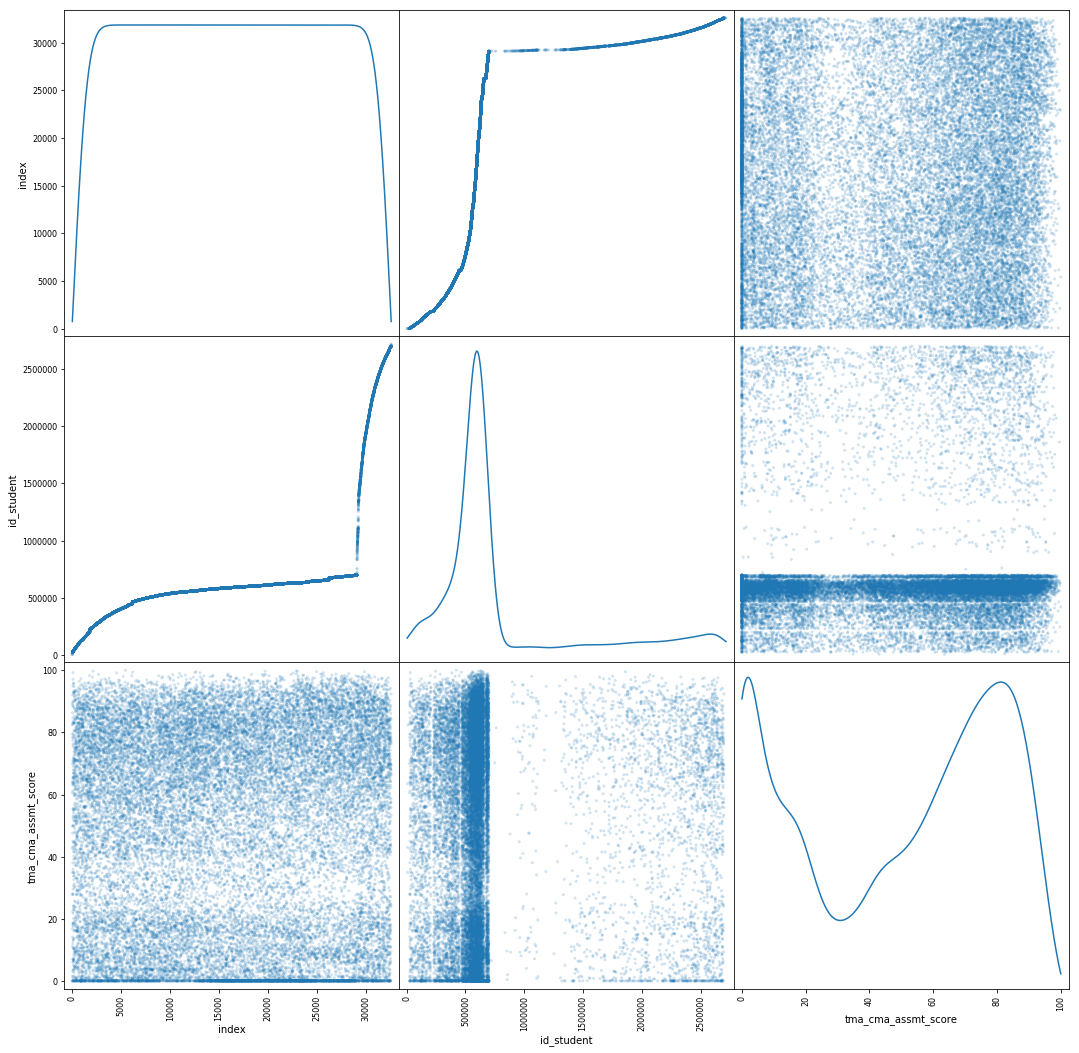

In [53]:
scatter_matrix(df_test, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [23]:
disconnectDB()

NameError: name 'cur' is not defined